In [2]:
%load_ext autoreload
%autoreload 2



In [4]:
#chack for importing from sibling dirs
import context

import matplotlib.pyplot as plt

%matplotlib inline

from functools import reduce
import statistics
import numpy as np


In [6]:
CAT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201'
DICT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201'
ART_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-categories-en-20111201'



In [7]:
import cat2vec.graph.loader as loader
graph = loader.load_graph(CAT_PATH, DICT_PATH, art_filepath=ART_PATH, root='History_of_Poland')



In [9]:
# nodes (categories), edges, articles
print('Number of nodes: ', len(graph.nodes))

edges_count = reduce(lambda x, y: x+y, map(lambda n: len(n.children), graph.nodes.values()), 0)
print('Edges count: ' + str(edges_count))

# articles_set = reduce(lambda x, y: x.union(y), map(lambda node: node.articles, graph.nodes.values()), set())
print('Total categories', graph.total_articles)



Number of nodes:  5325
Edges count: 7501
Total categories 45511


In [7]:
# Nodes degrees statistics: mean, median, std_dev
sub_categories = list(map(lambda n: len(n.children), graph.nodes.values()))
print('Statistic for subcategories per node:')
print('\tmean:', statistics.mean(sub_categories))
print('\tmedian:', statistics.median(sub_categories))
print('\t(population)std_dev:', statistics.pstdev(sub_categories))
print('\t90th percentile: ', np.percentile(sub_categories, 90))

sub_categories_without_leaf = list(filter(lambda x: x>0, sub_categories))
print('Statistic for subcategories per node without leafs:')
print('\tmean:', statistics.mean(sub_categories_without_leaf))
print('\tmedian:', statistics.median(sub_categories_without_leaf))
print('\t(population)std_dev:', statistics.pstdev(sub_categories_without_leaf))

parent_categories = list(map(lambda n: len(n.parents), graph.nodes.values()))
print('Statistic for parent categories per node:')
print('\tmean:', statistics.mean(parent_categories))
print('\tmedian:', statistics.median(parent_categories))
print('\t(population)std_dev:', statistics.pstdev(parent_categories))


Statistic for subcategories per node:
	mean: 1.408638497652582
	median: 0
	(population)std_dev: 3.3961260069719947
	99th percentile:  4.0
Statistic for subcategories per node without leafs:
	mean: 3.609720885466795
	median: 2.0
	(population)std_dev: 4.648702492043874
Statistic for parent categories per node:
	mean: 1.408638497652582
	median: 1
	(population)std_dev: 0.7743302578288493


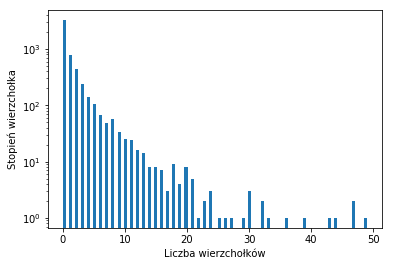

In [16]:
# visualization
plt.hist(sub_categories, log = True, bins=100)
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Stopień wierzchołka')
plt.savefig('nodes_degrees_dist.png')
plt.show()


In [11]:
# Nodes articles statistics
articles = list(map(lambda n: len(n.articles), graph.nodes.values()))
print('Statistic for subcategories per node:')
print('\tmean:', statistics.mean(articles))
print('\tmedian:', statistics.median(articles))
print('\t(population)std_dev:', statistics.pstdev(articles))


Statistic for subcategories per node:
	mean: 19.941032863849767
	median: 5
	(population)std_dev: 55.11614963063821


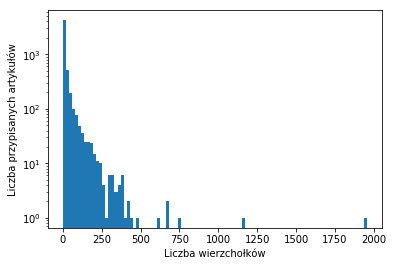

In [19]:
# visualization
plt.hist(articles, log = True, bins=100)
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Liczba przypisanych artykułów')
plt.savefig('articles_assignment_dist.png')
plt.show()
